In [1]:
import numpy as np
import pandas as pd
import os

# plotting
import matplotlib.pyplot as plt
import seaborn as sns
import colorcet as cc
import panel as pn

# image analysis
import skimage.io
import skimage.filters
import skimage.morphology
import skimage.segmentation
import skimage.measure
import scipy.ndimage

# import files
import glob

# pretty plots
%config InlineBackend.figure_format = 'retina'
sns.set()
pn.extension()

In [2]:
# define functions

# define image plot function
def plot_image(image,cmap=plt.cm.Greys_r,scale=1):
    "Print an image of 2D matrix"
    fig, ax = plt.subplots(figsize=(scale*8, scale*8))
    ax.imshow(image,cmap=cmap, aspect=1)
    ax.grid(False)

# define normalization function
def image_norm(im):
    im_norm = (im - np.min(im)) / (np.max(im) - np.min(im))
    return im_norm


In [3]:
path = 'data/ecoli_growth/'

# list of images
files = glob.glob(path + "*TRITC*.tif")
files

['data/ecoli_growth\\ecoli_TRITC_00.tif',
 'data/ecoli_growth\\ecoli_TRITC_01.tif',
 'data/ecoli_growth\\ecoli_TRITC_02.tif',
 'data/ecoli_growth\\ecoli_TRITC_03.tif',
 'data/ecoli_growth\\ecoli_TRITC_04.tif',
 'data/ecoli_growth\\ecoli_TRITC_05.tif',
 'data/ecoli_growth\\ecoli_TRITC_06.tif',
 'data/ecoli_growth\\ecoli_TRITC_07.tif',
 'data/ecoli_growth\\ecoli_TRITC_08.tif',
 'data/ecoli_growth\\ecoli_TRITC_09.tif',
 'data/ecoli_growth\\ecoli_TRITC_10.tif',
 'data/ecoli_growth\\ecoli_TRITC_11.tif',
 'data/ecoli_growth\\ecoli_TRITC_12.tif',
 'data/ecoli_growth\\ecoli_TRITC_13.tif',
 'data/ecoli_growth\\ecoli_TRITC_14.tif',
 'data/ecoli_growth\\ecoli_TRITC_15.tif',
 'data/ecoli_growth\\ecoli_TRITC_16.tif',
 'data/ecoli_growth\\ecoli_TRITC_17.tif',
 'data/ecoli_growth\\ecoli_TRITC_18.tif',
 'data/ecoli_growth\\ecoli_TRITC_19.tif',
 'data/ecoli_growth\\ecoli_TRITC_20.tif']

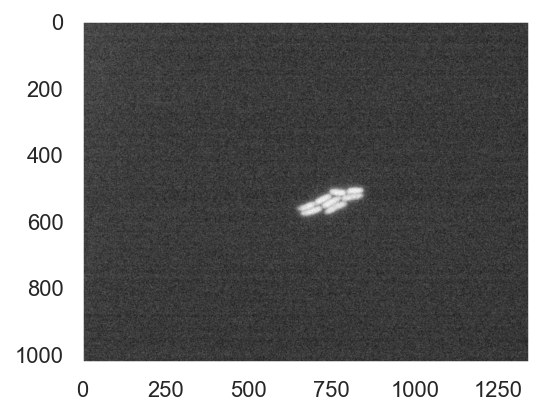

In [4]:
im = skimage.io.imread(files[0])
plot_image(im, scale = 0.5)

Tasks!
- Compute the number of pixels that belong to bacteria for each image and plot as a function of time
- Compute number of bacteria over time, average size (or distribution) over time

Amount of time between images: 5mins

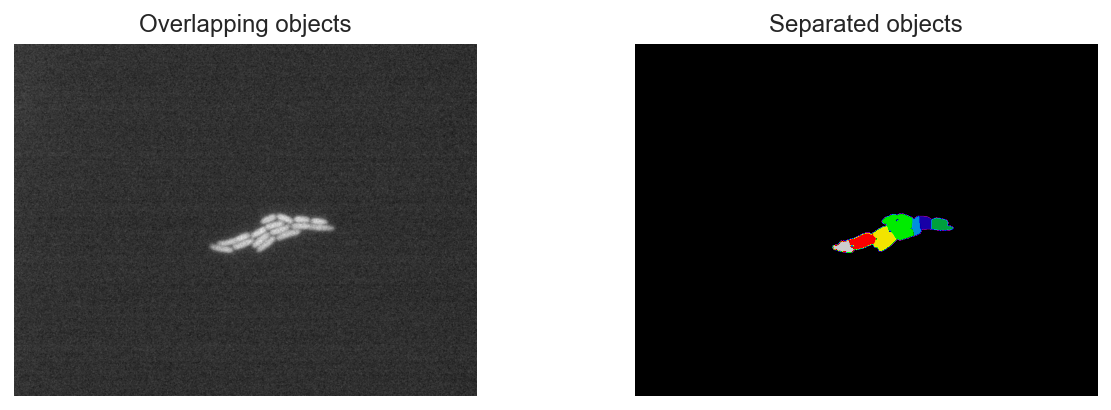

7


In [119]:
from skimage.segmentation import watershed
from skimage.feature import peak_local_max
from scipy import ndimage as ndi
from skimage.filters import threshold_otsu, threshold_local
from skimage.restoration import denoise_tv_chambolle

im_norm = image_norm(im)

#im_filter_gauss = skimage.filters.gaussian(im_norm, 10) 
im_filter_gauss=denoise_tv_chambolle(im_norm, weight=0.1)
im_filter_gauss=im_filter_gauss>0.5

#block_size = 35
#im_adapt = im_norm > threshold_local(im_filter_gauss, 35, 'mean')

im_bw = skimage.morphology.remove_small_objects(im_filter_gauss,min_size = 300)
im_bw = skimage.segmentation.clear_border(im_bw, buffer_size = 50)


# Now we want to separate the two objects in image
# Generate the markers as local maxima of the distance to the background
distance = ndi.distance_transform_edt(im_bw)
coords = peak_local_max(distance, footprint=np.ones((25, 25)), labels=im_bw)
mask = np.zeros(distance.shape, dtype=bool)
mask[tuple(coords.T)] = True
markers, _ = ndi.label(mask)
watershed_labels = watershed(-distance, markers, mask=im_bw)

fig, axes = plt.subplots(ncols=2, figsize=(9, 3), sharex=True, sharey=True)
ax = axes.ravel()

ax[0].imshow(im_norm, cmap=plt.cm.gray)
ax[0].set_title('Overlapping objects')
ax[1].imshow(watershed_labels, cmap=plt.cm.nipy_spectral)
ax[1].set_title('Separated objects')

for a in ax:
    a.set_axis_off()

fig.tight_layout()
plt.show();

print(np.max(watershed_labels))

In [120]:
files

['data/ecoli_growth\\ecoli_TRITC_00.tif',
 'data/ecoli_growth\\ecoli_TRITC_01.tif',
 'data/ecoli_growth\\ecoli_TRITC_02.tif',
 'data/ecoli_growth\\ecoli_TRITC_03.tif',
 'data/ecoli_growth\\ecoli_TRITC_04.tif',
 'data/ecoli_growth\\ecoli_TRITC_05.tif',
 'data/ecoli_growth\\ecoli_TRITC_06.tif',
 'data/ecoli_growth\\ecoli_TRITC_07.tif',
 'data/ecoli_growth\\ecoli_TRITC_08.tif',
 'data/ecoli_growth\\ecoli_TRITC_09.tif',
 'data/ecoli_growth\\ecoli_TRITC_10.tif',
 'data/ecoli_growth\\ecoli_TRITC_11.tif',
 'data/ecoli_growth\\ecoli_TRITC_12.tif',
 'data/ecoli_growth\\ecoli_TRITC_13.tif',
 'data/ecoli_growth\\ecoli_TRITC_14.tif',
 'data/ecoli_growth\\ecoli_TRITC_15.tif',
 'data/ecoli_growth\\ecoli_TRITC_16.tif',
 'data/ecoli_growth\\ecoli_TRITC_17.tif',
 'data/ecoli_growth\\ecoli_TRITC_18.tif',
 'data/ecoli_growth\\ecoli_TRITC_19.tif',
 'data/ecoli_growth\\ecoli_TRITC_20.tif']

data/ecoli_growth\ecoli_TRITC_00.tif


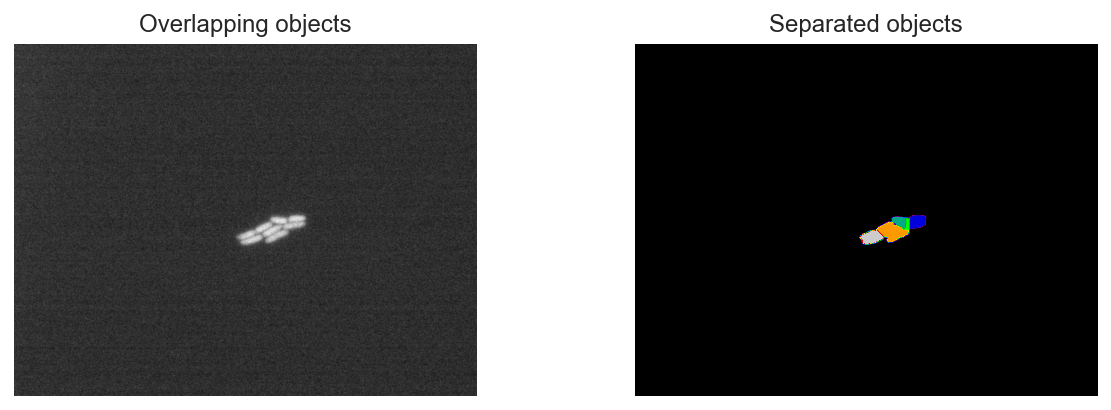

5
data/ecoli_growth\ecoli_TRITC_01.tif


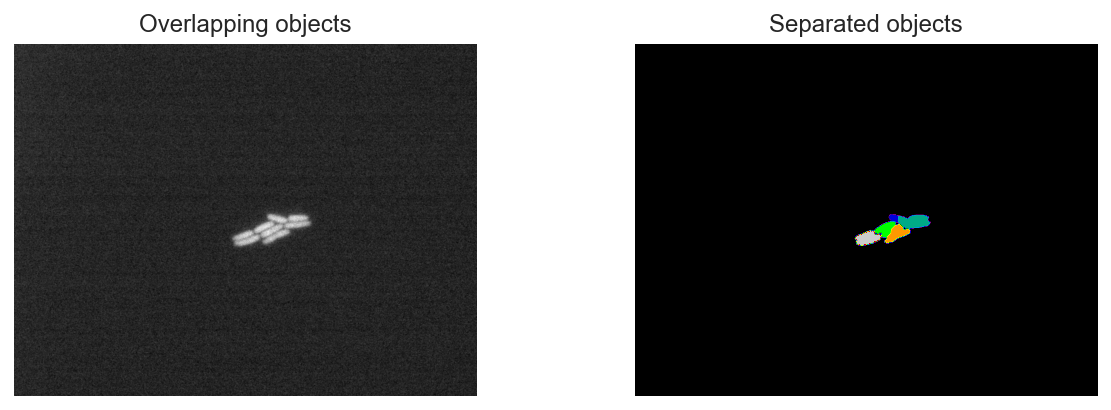

5
data/ecoli_growth\ecoli_TRITC_02.tif


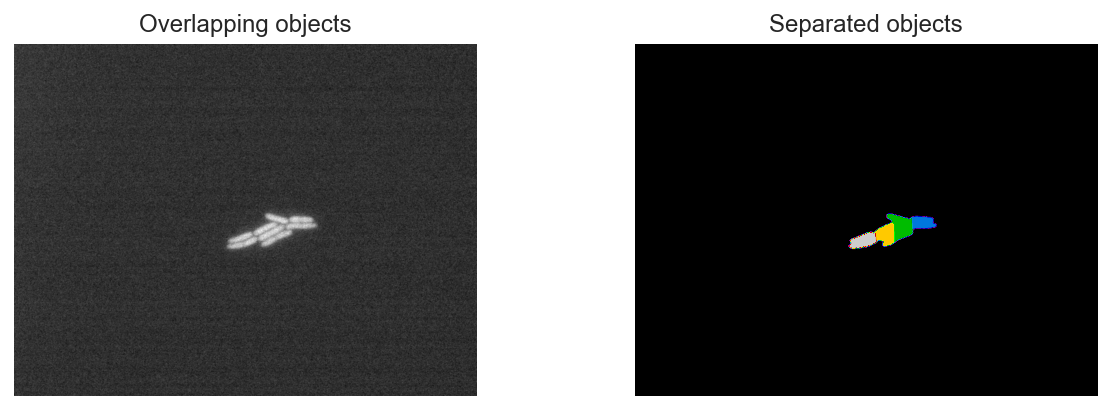

4
data/ecoli_growth\ecoli_TRITC_03.tif


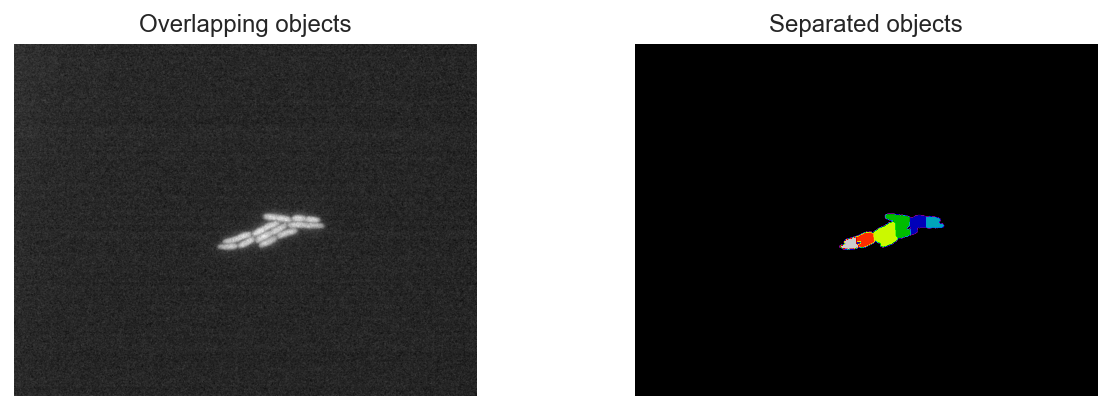

6
data/ecoli_growth\ecoli_TRITC_04.tif


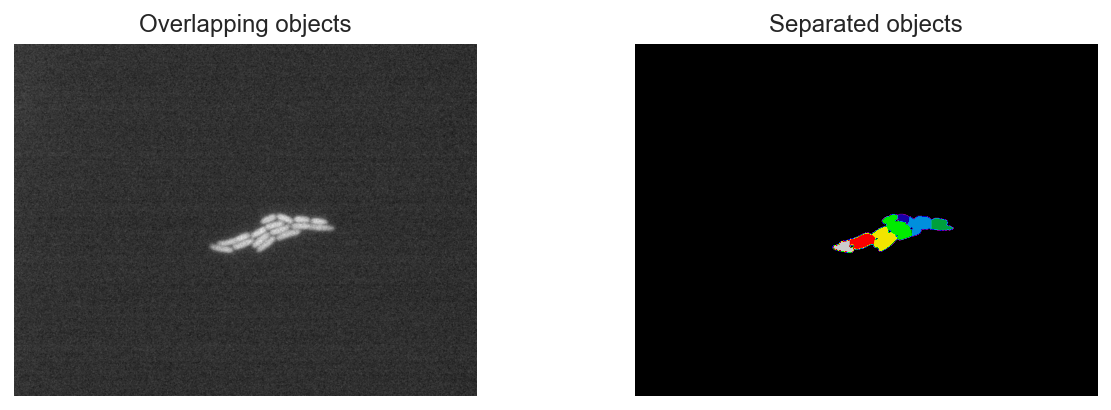

7
data/ecoli_growth\ecoli_TRITC_05.tif


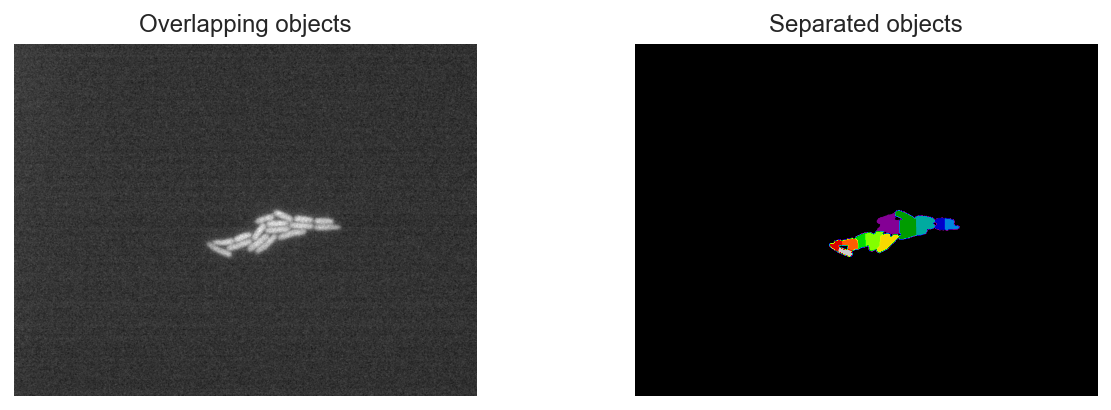

11
data/ecoli_growth\ecoli_TRITC_06.tif


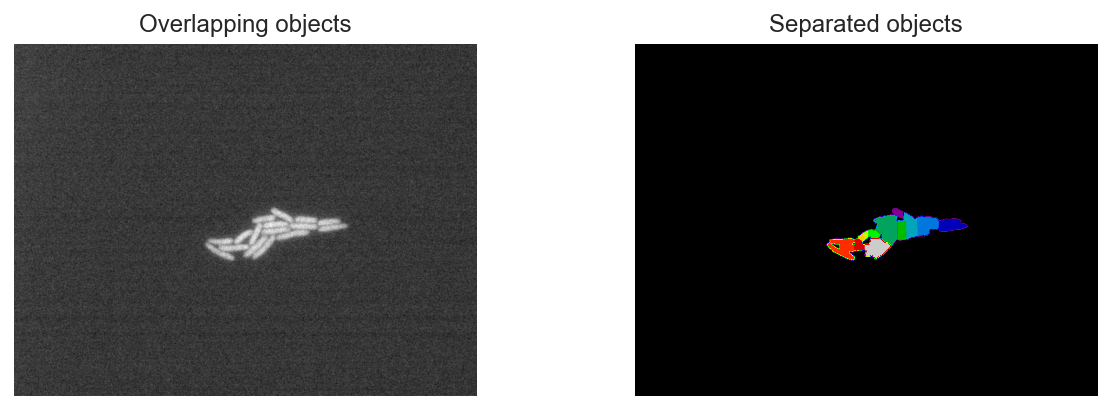

12
data/ecoli_growth\ecoli_TRITC_07.tif


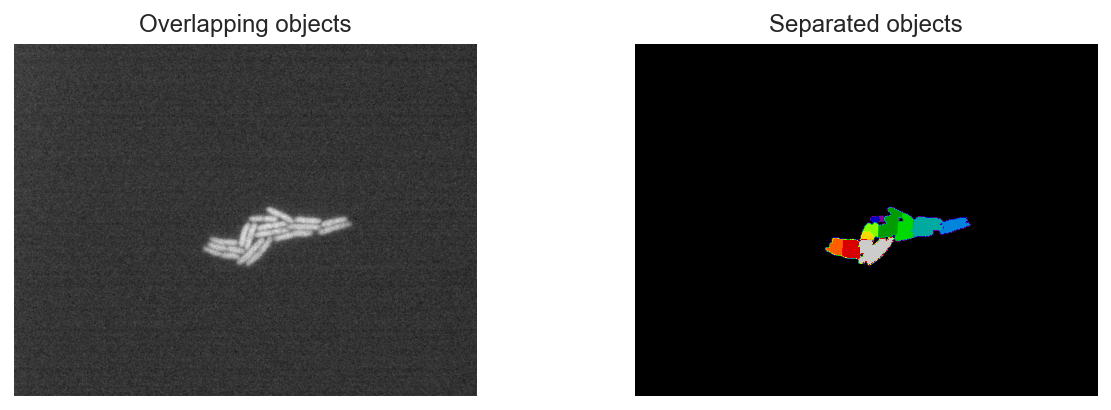

11
data/ecoli_growth\ecoli_TRITC_08.tif


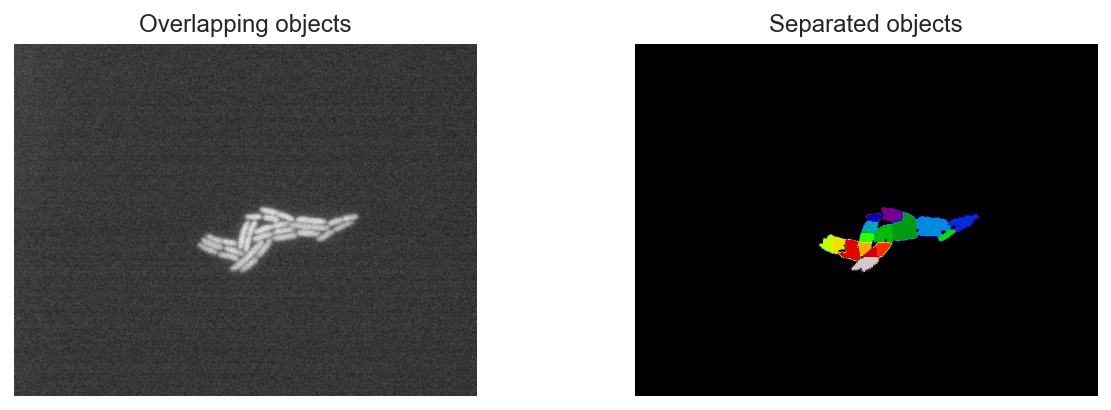

18
data/ecoli_growth\ecoli_TRITC_09.tif


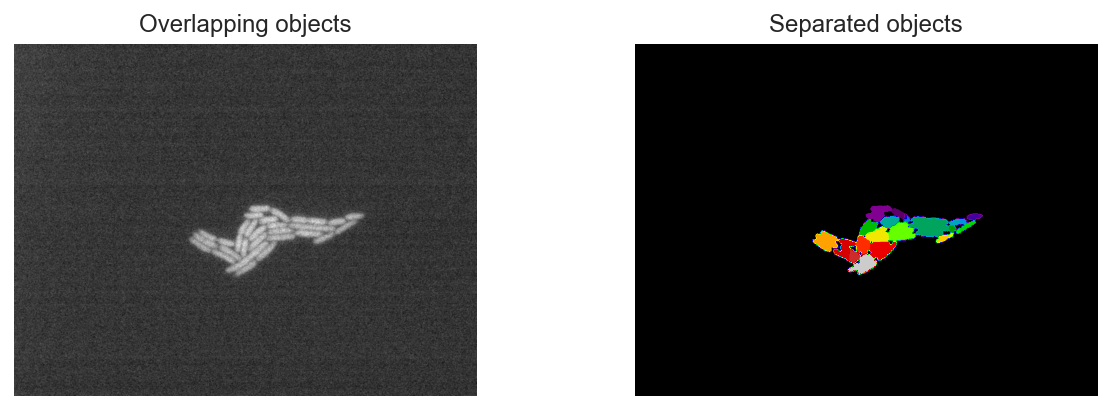

24
data/ecoli_growth\ecoli_TRITC_10.tif


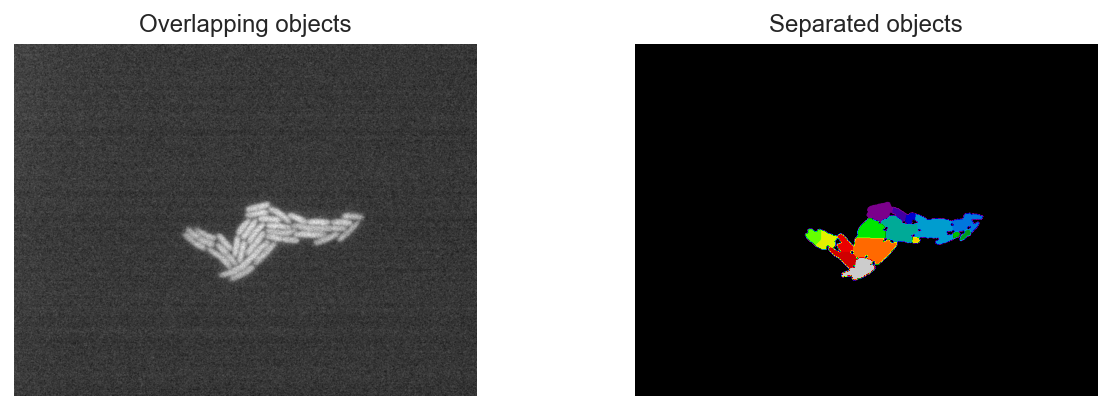

16
data/ecoli_growth\ecoli_TRITC_11.tif


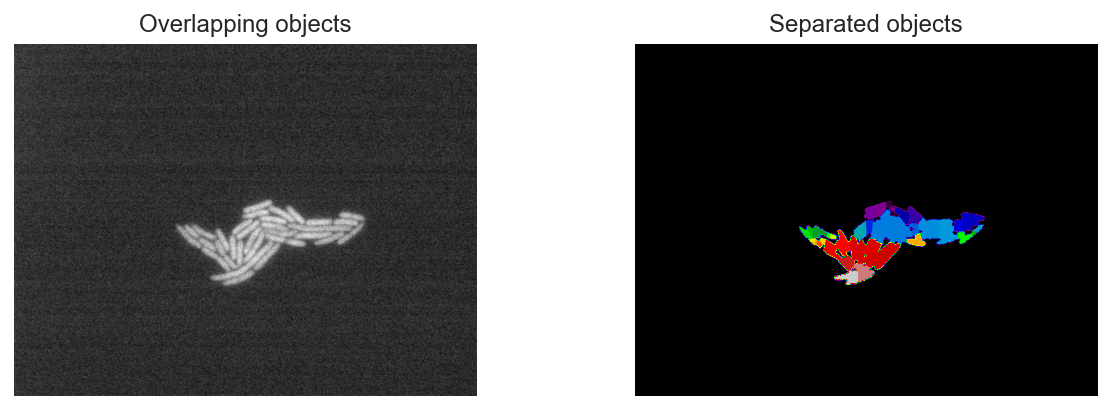

46
data/ecoli_growth\ecoli_TRITC_12.tif


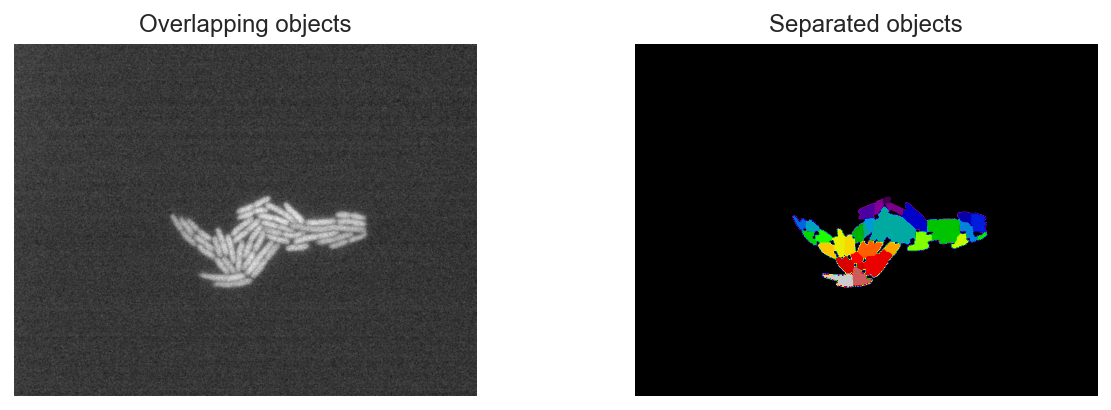

33
data/ecoli_growth\ecoli_TRITC_13.tif


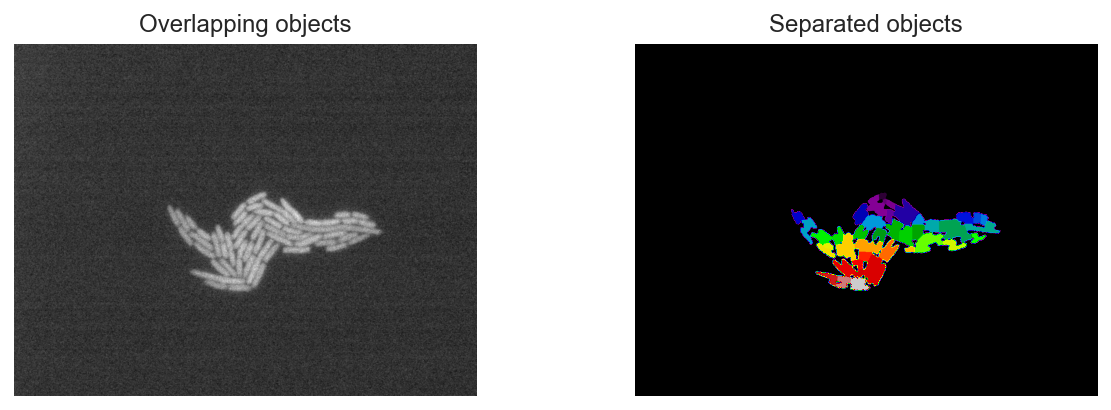

43
data/ecoli_growth\ecoli_TRITC_14.tif


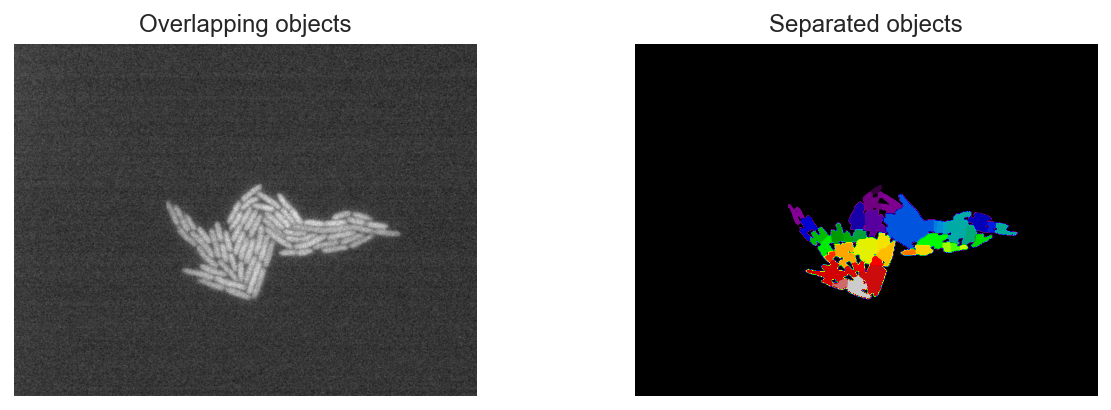

42
data/ecoli_growth\ecoli_TRITC_15.tif


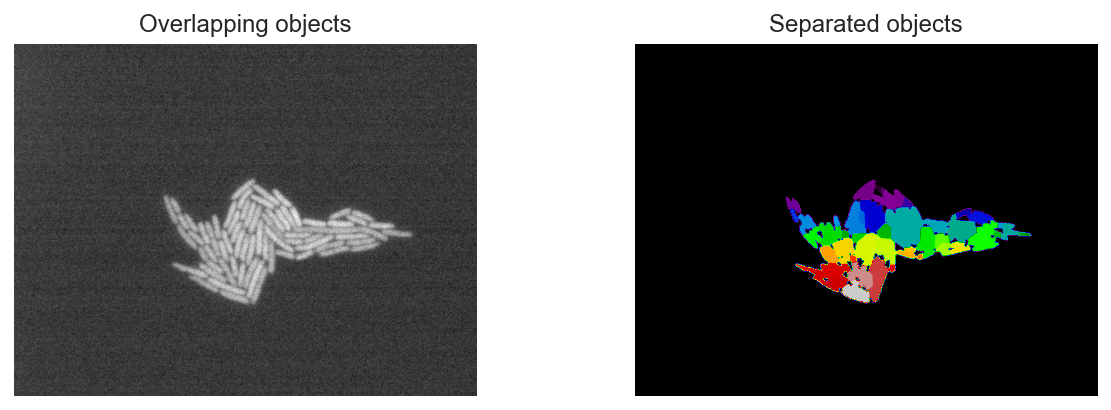

53
data/ecoli_growth\ecoli_TRITC_16.tif


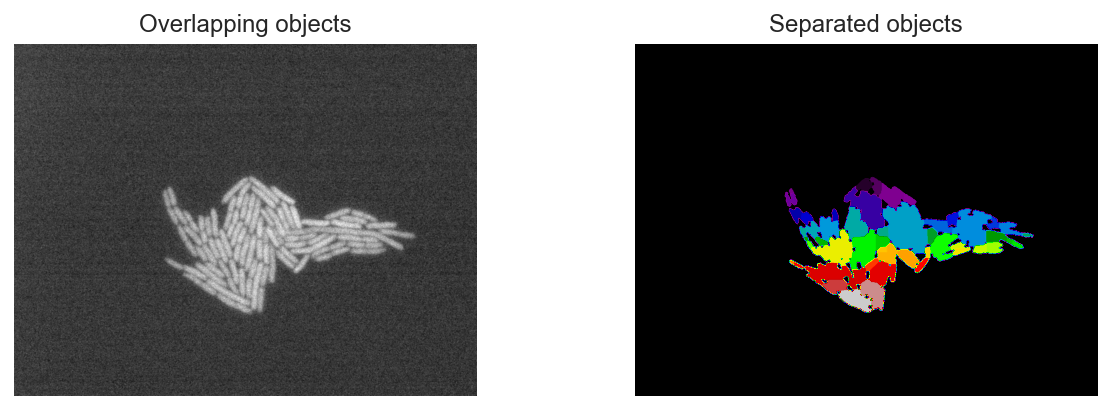

53
data/ecoli_growth\ecoli_TRITC_17.tif


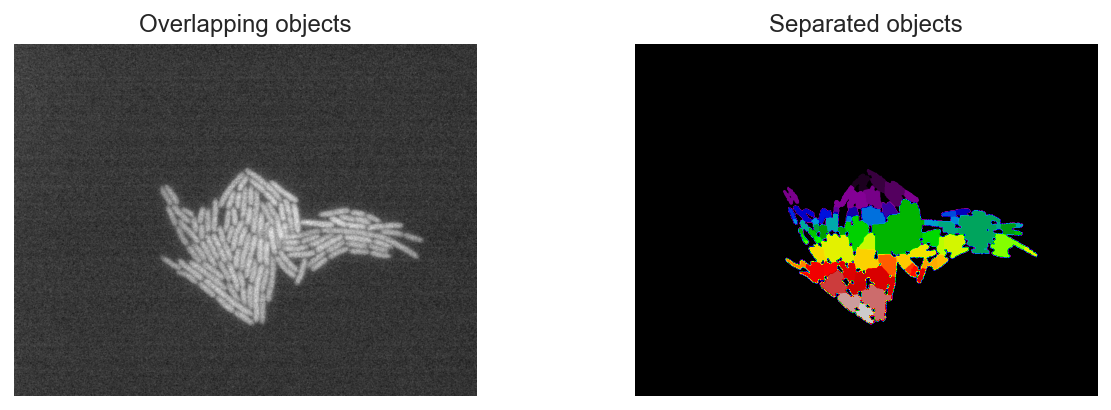

77
data/ecoli_growth\ecoli_TRITC_18.tif


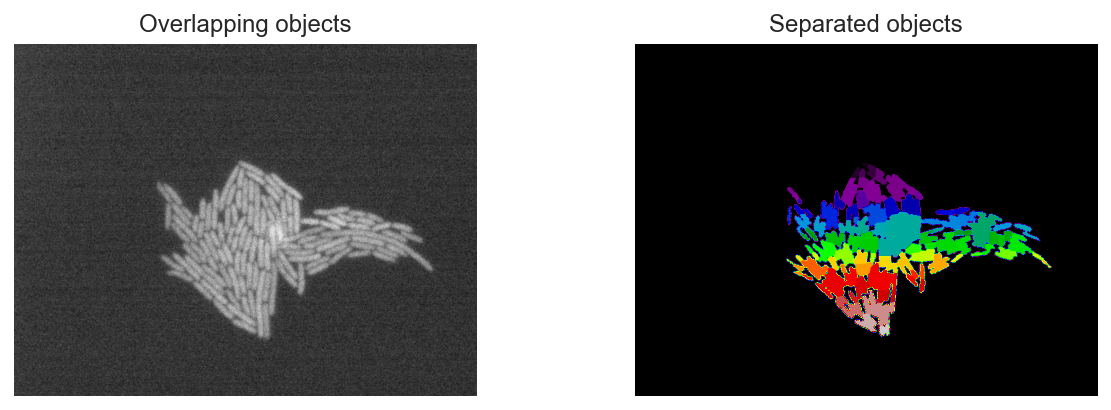

116
data/ecoli_growth\ecoli_TRITC_19.tif


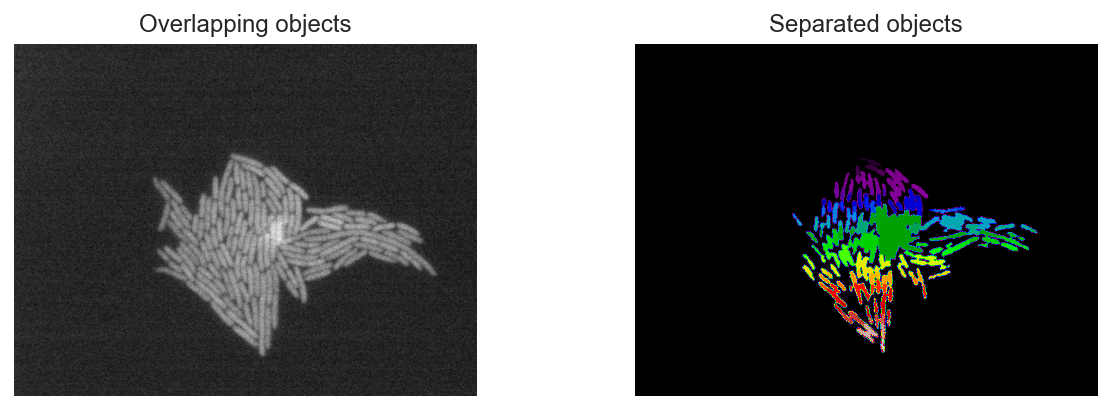

205
data/ecoli_growth\ecoli_TRITC_20.tif


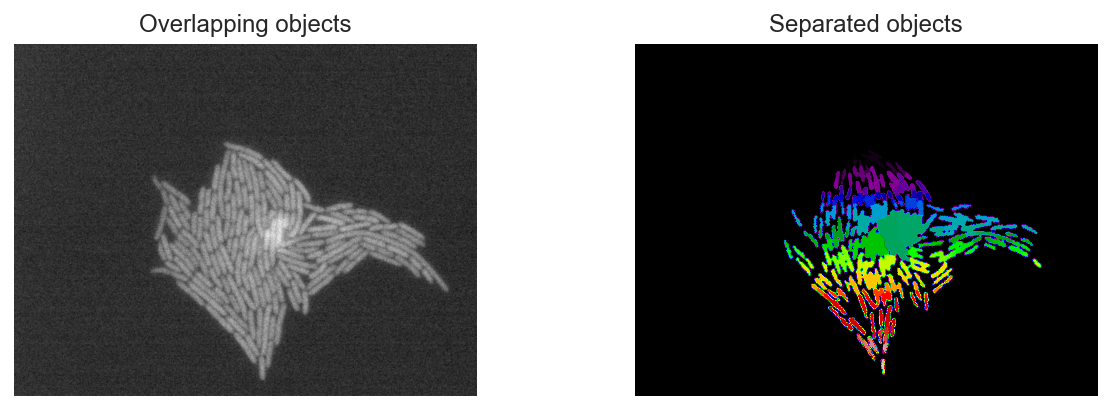

248


In [143]:
num_bac = []

for image in files:
    im = skimage.io.imread(image)

    print(image)

    im_norm=image_norm(im)

    #im_filter_gauss = skimage.filters.gaussian(im_norm, 10) 
    im_filter_gauss=denoise_tv_chambolle(im_norm, weight=0.1)
    im_filter_gauss=im_filter_gauss>0.5

    im_bw = skimage.morphology.remove_small_objects(im_filter_gauss,min_size = 300)
    im_bw = skimage.segmentation.clear_border(im_bw, buffer_size = 50)

    # Now we want to separate the two objects in image
    # Generate the markers as local maxima of the distance to the background
    distance = ndi.distance_transform_edt(im_bw)
    coords = peak_local_max(distance, footprint=np.ones((25, 25)), labels=im_bw)
    im_bw = skimage.morphology.remove_small_objects(im_filter_gauss,min_size = 300)
    im_bw = skimage.segmentation.clear_border(im_bw, buffer_size = 50)

    distance = ndi.distance_transform_edt(im_bw)
    coords = peak_local_max(distance, footprint=np.ones((25, 25)), labels=im_bw)
    mask = np.zeros(distance.shape, dtype=bool)
    mask[tuple(coords.T)] = True
    markers, _ = ndi.label(mask)
    watershed_labels = watershed(-distance, markers, mask=im_bw)

    fig, axes = plt.subplots(ncols=2, figsize=(9, 3), sharex=True, sharey=True)
    ax = axes.ravel()

    ax[0].imshow(im, cmap=plt.cm.gray)
    ax[0].set_title('Overlapping objects')
    ax[1].imshow(watershed_labels, cmap=plt.cm.nipy_spectral)
    ax[1].set_title('Separated objects')

    for a in ax:
        a.set_axis_off()

    fig.tight_layout()
    plt.show()

    print(np.max(watershed_labels))
    num_bac.append(np.max(watershed_labels))


<AxesSubplot:>

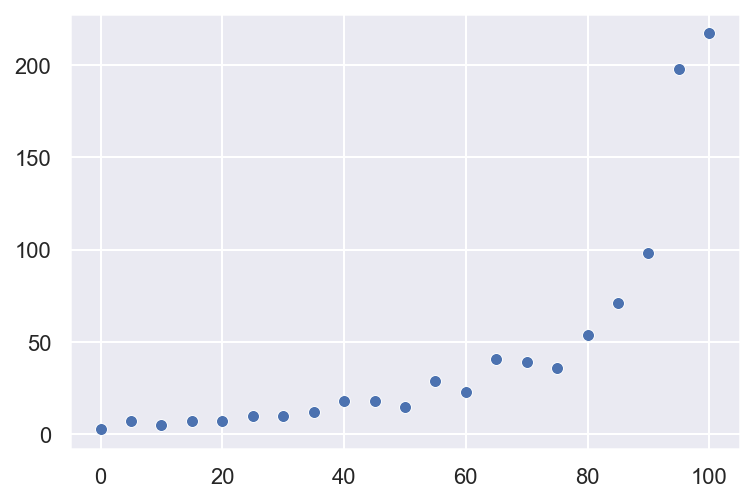

In [134]:
sns.scatterplot(np.arange(0,21*5,5),num_bac)

data/ecoli_growth\ecoli_TRITC_00.tif
data/ecoli_growth\ecoli_TRITC_01.tif
data/ecoli_growth\ecoli_TRITC_02.tif
data/ecoli_growth\ecoli_TRITC_03.tif
data/ecoli_growth\ecoli_TRITC_04.tif
data/ecoli_growth\ecoli_TRITC_05.tif
data/ecoli_growth\ecoli_TRITC_06.tif
data/ecoli_growth\ecoli_TRITC_07.tif
data/ecoli_growth\ecoli_TRITC_08.tif
data/ecoli_growth\ecoli_TRITC_09.tif
data/ecoli_growth\ecoli_TRITC_10.tif
data/ecoli_growth\ecoli_TRITC_11.tif
data/ecoli_growth\ecoli_TRITC_12.tif
data/ecoli_growth\ecoli_TRITC_13.tif
data/ecoli_growth\ecoli_TRITC_14.tif
data/ecoli_growth\ecoli_TRITC_15.tif
data/ecoli_growth\ecoli_TRITC_16.tif
data/ecoli_growth\ecoli_TRITC_17.tif
data/ecoli_growth\ecoli_TRITC_18.tif
data/ecoli_growth\ecoli_TRITC_19.tif
data/ecoli_growth\ecoli_TRITC_20.tif


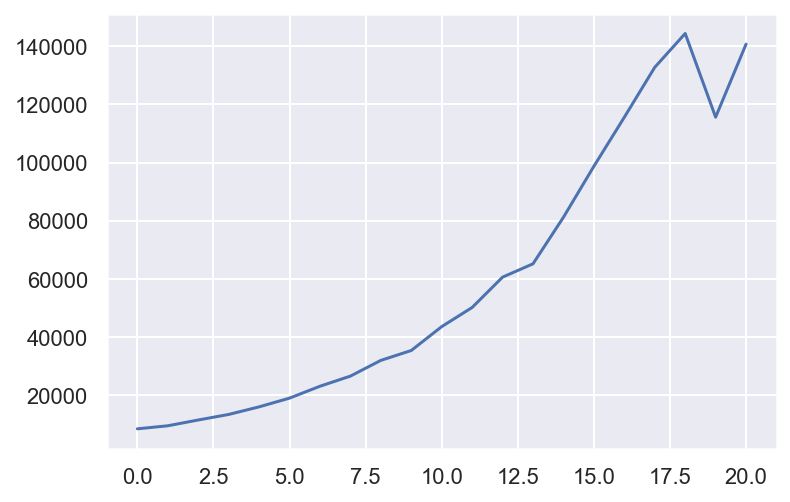

In [114]:
# exponential growth of area

area_bac = []

for i, image in enumerate(files):
    im = skimage.io.imread(image)
    print(i, image)

    im_norm = image_norm(im)
    im_filter_gauss=denoise_tv_chambolle(im_norm, weight=0.1)
    im_filter_gauss=im_filter_gauss>0.5

    im_bw = skimage.morphology.remove_small_objects(im_filter_gauss,min_size = 300)
    im_bw = skimage.segmentation.clear_border(im_bw, buffer_size = 50)

    area_bac.append(list(im_bw.flatten()).count(1))

plt.plot(area_bac)

In [141]:
def err(areas, times, growth_rate):
    """
    Function that computes error between theory and data.

    Parameters
    ----------
    areas : array-like
        Experimentally determined area of colonies.
    times : array-like
        Time points of measurements.
    growth-rate: float
        Growth-rate Lambda.

    Return
    ------
    error : float
        Sum of squared error between theory and experiment. 
    """

    # compute theoretical prediction
    theory = areas[0] * np.exp(times * growth_rate)

    # compute error
    r_sqr = np.sum((areas - theory)**2)

    return r_sqr

In [142]:
area_bac

[8444,
 9493,
 11482,
 13390,
 16000,
 19002,
 23092,
 26573,
 31983,
 35386,
 43593,
 50178,
 60612,
 65195,
 81206,
 98736,
 115600,
 132778,
 144405,
 115626,
 140741]

In [138]:
# define array of possible growth rates
lambda_array = np.linspace(0.02, 1, 100)

# initialize array for errors
err_array = np.zeros(len(lambda_array))

for i, lamb in enumerate(lambda_array):
    err_array[i] = err(area_bac,i,lamb)

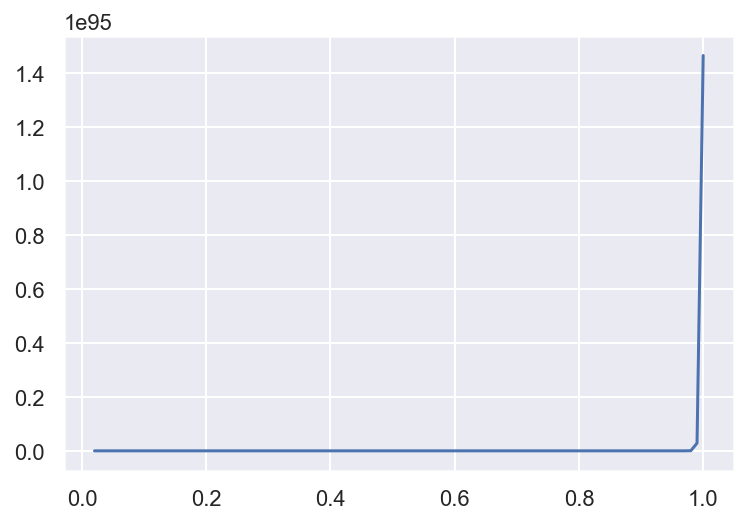

In [139]:
plt.plot(lambda_array,err_array)